# Exploratory Data Analysis (EDA)

### Import Libraries

In [33]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [34]:
basicdata = pd.read_csv('Data/gtzan-musicspeech-collection/datalables.txt')

In [35]:
basicdata.head()

,Filename,Music
0,acomic2.wav,0
1,acomic.wav,0
2,allison.wav,0
3,amal.wav,0
4,austria.wav,0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff157b40a20>]],
      dtype=object)

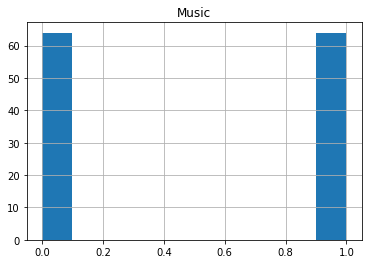

In [36]:
basicdata.hist(column='Music')

In [37]:
CorpusPath = 'Data/gtzan-musicspeech-collection/Corpus/'
Corpusfiles = listdir(CorpusPath)
fn =len(Corpusfiles)

In [47]:
import random
selected = random.choice(Corpusfiles)

### Take a look at its Spectrogram

In [48]:
import librosa
import librosa.display
import IPython.display as ipd

In [49]:
x, Fs = librosa.load(CorpusPath+selected)
X = librosa.stft(x)
print('Playing the file: '+selected)
ipd.Audio(CorpusPath+selected) 

Playing the file: relation.wav


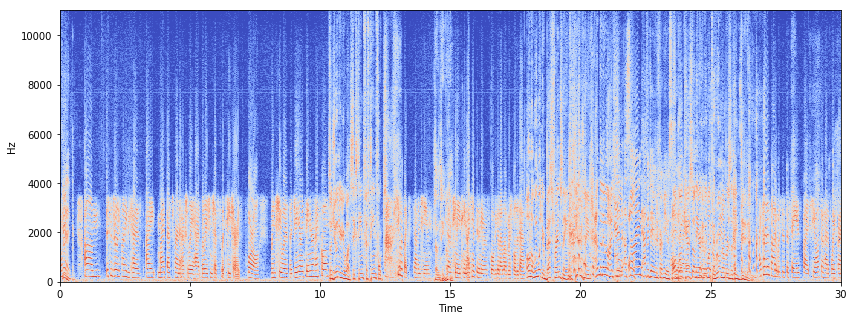

In [50]:
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=Fs, x_axis='time', y_axis='hz')

In [51]:
print(X)

[[ 1.2042325e+01+0.0000000e+00j  1.2210838e+01+0.0000000e+00j
   1.2330946e+01+0.0000000e+00j ...  1.1516703e+01+0.0000000e+00j
   1.1487843e+01+0.0000000e+00j  1.0745997e+01+0.0000000e+00j]
 [-6.1601248e+00-2.6541269e-16j -5.9141645e+00+1.8975137e-01j
  -6.3626390e+00-8.1093878e-02j ... -5.7604456e+00+2.3595038e-01j
  -5.8587461e+00-2.6965865e-01j -5.4854336e+00-4.6367416e-01j]
 [ 8.0918515e-01+4.6035642e-16j -5.1789099e-01-5.6187415e-01j
   1.0893272e-01+3.5788172e-01j ...  3.6784552e-02-2.1632612e-01j
   3.4164211e-01+2.7377900e-01j  1.6895956e-01-3.9199445e-01j]
 ...
 [ 3.0351753e-04+1.7021555e-16j  1.3213911e-03-6.5477140e-04j
   1.5619185e-03-3.8225427e-03j ... -1.8096616e-03-1.2880230e-03j
  -6.8369824e-03+8.7675126e-03j -6.3074050e-03-9.7144181e-03j]
 [-3.1191963e-03-6.8174633e-16j -2.1776995e-03+3.1380593e-03j
   5.0900592e-03+6.8197888e-03j ...  1.1150632e-02+1.5961631e-03j
   4.9413713e-03-1.1197110e-02j -5.8602802e-03-1.1138533e-02j]
 [ 4.8929346e-03+0.0000000e+00j  1.51326